In [1]:
#Testing of Normality of a given data

# Shapiro-Wilk Test
import pandas as pd
import numpy as np
import random as random
from scipy.stats import shapiro ,norm 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
df2 = pd.read_csv('d1.csv', names = ['Locations' , '$\mu1$', '$\mu2$','$\mu3$','$\mu4$', '$\mu5$','Avg','SE']) # for standard error(SE) , we can do STDEV(B1:B10)/SQRT(COUNT(B1:B10)) in excell.
df2

,Locations,$\mu1$,$\mu2$,$\mu3$,$\mu4$,$\mu5$,Avg,SE
0,A,1.31,1.33,1.299,1.310,1.34,1.310,0.007473
1,B,1.32,1.31,1.320,1.321,1.29,1.310,0.005903
2,C,1.32,1.32,1.310,1.330,1.31,1.318,0.003742
3,D,1.38,1.34,1.330,1.310,1.35,1.340,0.011576
4,E,1.35,1.31,1.320,1.330,1.32,1.326,0.006782


In [2]:
df2.set_index("Locations", inplace= True)


In [3]:
df2

,$\mu1$,$\mu2$,$\mu3$,$\mu4$,$\mu5$,Avg,SE
Locations,,,,,,,
A,1.31,1.33,1.299,1.310,1.34,1.310,0.007473
B,1.32,1.31,1.320,1.321,1.29,1.310,0.005903
C,1.32,1.32,1.310,1.330,1.31,1.318,0.003742
D,1.38,1.34,1.330,1.310,1.35,1.340,0.011576
E,1.35,1.31,1.320,1.330,1.32,1.326,0.006782


In [4]:
G = df2[["SE"]] 
G

,SE
Locations,
A,0.007473
B,0.005903
C,0.003742
D,0.011576
E,0.006782


In [5]:
df2.SE[3:5]

Locations
D    0.011576
E    0.006782
Name: SE, dtype: float64

In [6]:
S= df2.loc['E'][0:5]
S


$\mu1$    1.35
$\mu2$    1.31
$\mu3$    1.32
$\mu4$    1.33
$\mu5$    1.32
Name: E, dtype: float64

In [7]:
F = df2.loc['D'][0:5]
F

$\mu1$    1.38
$\mu2$    1.34
$\mu3$    1.33
$\mu4$    1.31
$\mu5$    1.35
Name: D, dtype: float64

In [8]:
# normality test
stat, p = shapiro(S)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=0.914, p=0.492


# Since the p value is greater than 0.05 , we can say that the given distribution is  normal. 

In [9]:
f = S
sd =f.std()
mu = f.mean()
a ,b = mu-3*sd, mu+3*sd
x = np.linspace(a,b,1000)
y = norm.pdf(x, loc = mu, scale = sd)

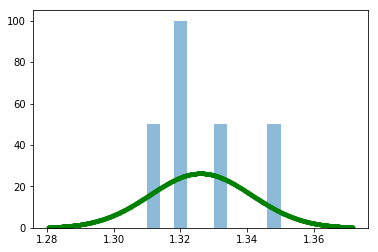

In [10]:


plt.plot(x,y,'.g')

plt.hist(f,alpha=.5, density = True)
plt.savefig("diy")


In [11]:
## QQ plot

In [12]:
import statsmodels.api as sm 
import pylab as py 

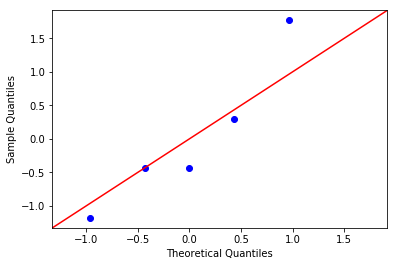

In [13]:
sm.qqplot(f, fit= True, line = "45") 
plt.savefig("Diyaa.png")
py.show() 


In [14]:
#Hypothesis testing between two samples: t-test

In [15]:
x=S
y = F

In [16]:
# t-test for dependent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import t
 
# function for calculating the t-test for two dependent samples
def dependent_ttest(x, y, alpha):
	# calculate means
	mean1, mean2 = mean(x), mean(y)
	# number of paired samples
	n = len(x)
	# sum squared difference between observations
	d1 = sum([(x[i]-y[i])**2 for i in range(n)])
	# sum difference between observations
	d2 = sum([x[i]-y[i] for i in range(n)])
	# standard deviation of the difference between means
	sd = sqrt((d1 - (d2**2 / n)) / (n - 1))
	# standard error of the difference between the means
	sed = sd / sqrt(n)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = n - 1
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 

# calculate the t test
alpha = 0.05
t_stat, df, cv, p = dependent_ttest(x, y, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=-1.633, df=4, cv=2.132, p=0.178
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


In [17]:
# Hence it is concluded that there is no significant differences of the mean of the data at Chhapre and Salkot. Hence data are independent. 

# Bar diagram with error bars 

In [19]:
import matplotlib.pyplot as plt
import numpy as np





In [20]:
df2

,$\mu1$,$\mu2$,$\mu3$,$\mu4$,$\mu5$,Avg,SE
Locations,,,,,,,
A,1.31,1.33,1.299,1.310,1.34,1.310,0.007473
B,1.32,1.31,1.320,1.321,1.29,1.310,0.005903
C,1.32,1.32,1.310,1.330,1.31,1.318,0.003742
D,1.38,1.34,1.330,1.310,1.35,1.340,0.011576
E,1.35,1.31,1.320,1.330,1.32,1.326,0.006782


In [21]:
x = ["A","B","C","D", "E"]
mean = [df2.Avg[0],df2.Avg[1],df2.Avg[2],df2.Avg[3], df2.Avg[4]]
Error = [df2.SE[0],df2.SE[1],df2.SE[2],df2.SE[3],df2.SE[4]]

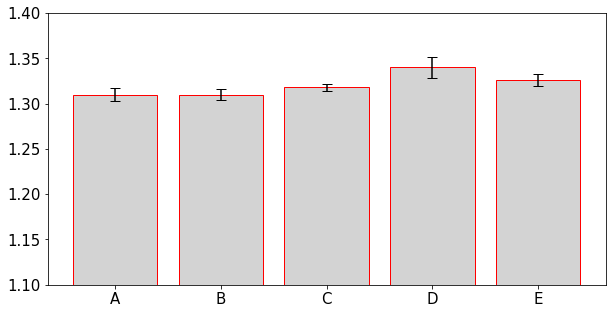

In [22]:
plt.figure(figsize=(10,5)) 
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.ylim(1.10, 1.4)


plt.bar(x,mean,yerr = Error, color='lightgray', ec = 'red',capsize =5)

plt.savefig("Diya", dpi =100)


# Bar diagram shows that data are homegeneous more in 'C' than any other. 

In [23]:
# Analysis of variance(ANOVA) with box plots

In [24]:
df = pd.read_csv("d2.csv")
df

,A,B,C,D,E
0,1.310,1.320,1.32,1.38,1.35
1,1.330,1.310,1.32,1.34,1.31
2,1.299,1.320,1.31,1.33,1.32
3,1.310,1.321,1.33,1.31,1.33
4,1.340,1.290,1.31,1.35,1.32


In [25]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E'])
df_melt

,index,variable,value
0,0,A,1.310
1,1,A,1.330
2,2,A,1.299
3,3,A,1.310
4,4,A,1.340
5,0,B,1.320
6,1,B,1.310
7,2,B,1.320
8,3,B,1.321
9,4,B,1.290


In [26]:
df_melt.columns = ['SN', 'Locations', 'Refractive_index'] 
df_melt

,SN,Locations,Refractive_index
0,0,A,1.310
1,1,A,1.330
2,2,A,1.299
3,3,A,1.310
4,4,A,1.340
5,0,B,1.320
6,1,B,1.310
7,2,B,1.320
8,3,B,1.321
9,4,B,1.290


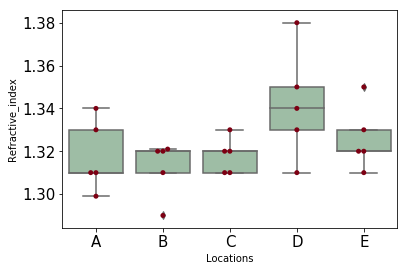

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Locations', y='Refractive_index', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="Locations", y="Refractive_index", data=df_melt, color='#7d0013')
plt.show()

In [28]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value

In [29]:
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'])
print(fvalue, pvalue) 

2.3644091611634144 0.08763221861372215


In [30]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [31]:
# Ordinary Least Squares (OLS) model
model = ols('Refractive_index ~ C(Locations)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table 

,sum_sq,df,F,PR(>F)
C(Locations),0.002692,4.0,2.364409,0.087632
Residual,0.005694,20.0,NaN,NaN


In [32]:
# Since p value is greater than 0.05 (alpha = 0.05),which shows that there is no significant difference between average refractive index from different sources of water.


In [33]:
#np.cov(data)
# correlation between x and y
# t test
# result significance from p value

In [34]:
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html
# https://www.youtube.com/watch?v=F6kmIpWWEdU 
#https://www.youtube.com/watch?v=CGF9YnkNul8 
#https://www.reneshbedre.com/blog/anova.html

In [35]:
# https://github.com/dharmapaudel 